In [4]:
from datasets import load_dataset
from transformers import LlamaTokenizer


tokenizer = LlamaTokenizer.from_pretrained(
    "llama/models", add_eos_token=True
)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.eos_token_id

data = load_dataset("json", data_files="data/QA_latex.json")


def generate_prompt(data_point):
    # sorry about the formatting disaster gotta move fast
    if data_point["input"]:
        return f"""Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Input:
{data_point["input"]}

### Response:
{data_point["output"]}"""
    else:
        return f"""Below is an instruction that describes a task. Write a response that appropriately completes the request.

### Instruction:
{data_point["instruction"]}

### Response:
{data_point["output"]}"""


data = data.map(
    lambda data_point: {"prompt": tokenizer(generate_prompt(data_point))}
)

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /home/vateseifelfrej/.cache/huggingface/datasets/json/default-147e68ab7eebb244/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Map:   0%|          | 0/1831 [00:00<?, ? examples/s]

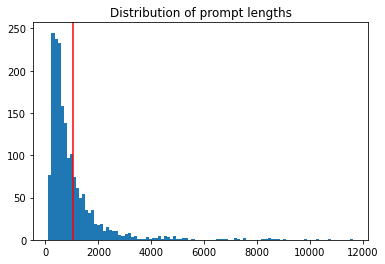

In [5]:
import matplotlib.pyplot as plt

lens = [len(x["prompt"]["input_ids"]) for x in data["train"]]
plt.hist(lens, bins=100)
plt.title("Distribution of prompt lengths")
plt.axvline(1024, color="red")

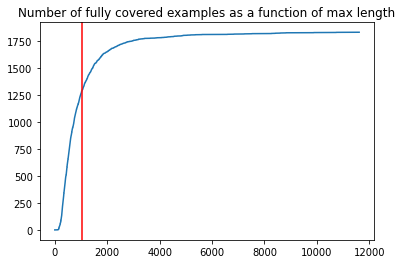

In [6]:
plt.plot([len([l for l in lens if l <= m]) for m in range(max(lens) + 1)])
plt.title("Number of fully covered examples as a function of max length")
plt.axvline(x=1024, color="red")

Percentage of tokens left out:

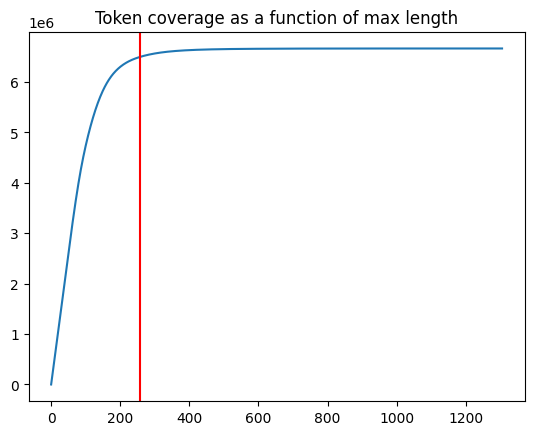

In [4]:
plt.plot([sum(min(l, m) for l in lens) for m in range(max(lens) + 1)])
plt.title("Token coverage as a function of max length")
plt.axvline(x=256, color="red")